# 1. Problem Definition

given data related to person behaviour ,we need to predict that either they are introvert or extrovert.
    it is binary classifier 

### 1.1 Data overview
A structured overview of the features used to classify a person's personality (e.g., introvert or extrovert).

---

## 📌 Features

| 🔢 Feature                  | 📝 Description |
|----------------------------|----------------|
| `id`                       | Unique identifier for each individual |
| `time_spent_alone`         | Average hours spent alone per day |
| `stage_fear`               | Level of stage fear (e.g., 0–5 scale or boolean) |
| `social_event_attendance`  | Number of social events attended per month |
| `going_outside`            | Times a person goes outside per week |
| `drained_after_socializing` | Indicates if socializing feels draining (boolean or scale) |
| `friends_circle_size`      | Number of close friends or typical friend group size |
| `post_frequency`           | Number of social media posts per week |
| `personality`              | **🎯 Target variable** – Labelled as `"introvert"` or `"extrovert"` |




### 📏 1.2 Evaluation Metric: `accuracy_score`

---

**`sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)`**

📌 **Description**  
Returns the **accuracy classification score**, which is the ratio of correctly predicted samples to the total number of samples.

In **multilabel classification**, it computes **subset accuracy**:  
> The predicted set of labels for a sample must **exactly match** the corresponding set of labels in `y_true`.

---

#### 🧠 Parameters:
- `y_true`: Ground truth (correct) labels.
- `y_pred`: Predicted labels.
- `normalize` (default=`True`):  
  - If `True`, return the fraction of correctly classified samples.  
  - If `False`, return the number of correctly classified samples.
- `sample_weight`: Optional array of sample weights.




# 2 Data 

### 2.1 Preparing the tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Print last updated
import datetime
print(f"Notebook last updated: {datetime.datetime.now()}\n")

# Print versions of libraries we're using (as long as yours are equal or greater than these, your code should work)
print(f"NumPy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")

Notebook last updated: 2025-07-29 13:49:22.718209

NumPy version: 2.3.1
pandas version: 2.3.1


### 2.2 data loading

In [3]:
df =pd.read_csv("train.csv")

In [4]:
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [5]:
df.shape

(18524, 9)

### 2.3 EDA

In [6]:
df.isnull().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [7]:
df.Personality.value_counts()

Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64

In [8]:
df.Personality.value_counts(normalize=True)

Personality
Extrovert    0.739527
Introvert    0.260473
Name: proportion, dtype: float64

<Axes: xlabel='Personality'>

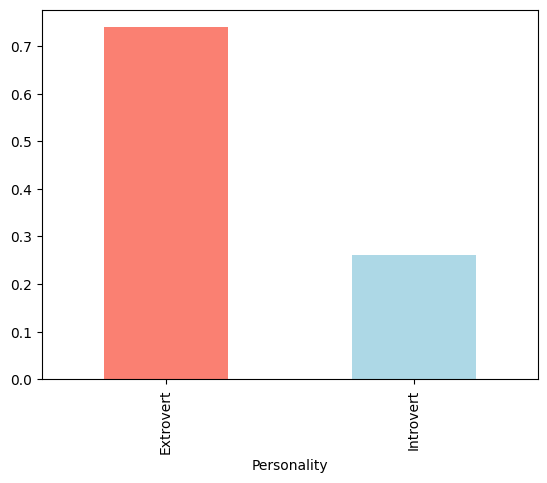

In [9]:
df.Personality.value_counts(normalize=True).plot(kind="bar",color=["salmon","lightblue"])

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [11]:
pd.crosstab(index=df.Stage_fear,columns=df.Personality)

Personality,Extrovert,Introvert
Stage_fear,,
No,12314,295
Yes,236,3786


### 2.4 Visualization

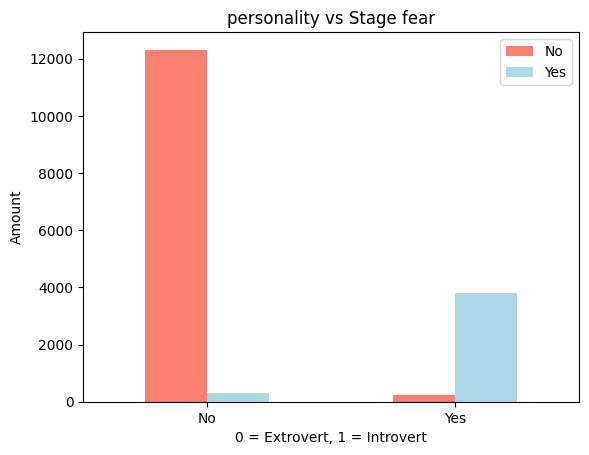

In [12]:
pd.crosstab(index=df.Stage_fear,columns=df.Personality).plot(kind='bar',color=["salmon",'lightblue'])

plt.title("personality vs Stage fear")
plt.xlabel("0 = Extrovert, 1 = Introvert")
plt.ylabel("Amount")
plt.legend(["No", "Yes"])
plt.xticks(rotation=0);

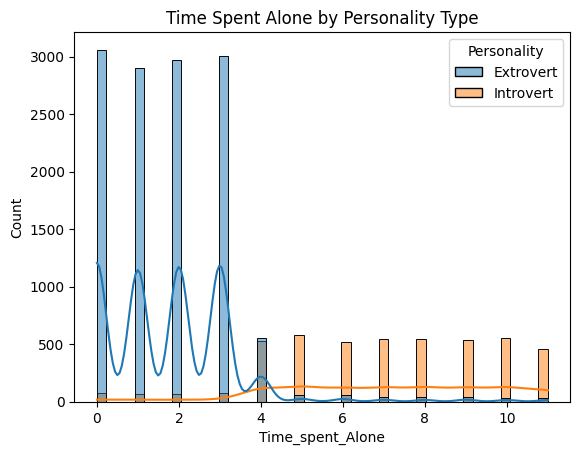

In [13]:
sns.histplot(data=df, x='Time_spent_Alone', hue='Personality', kde=True)
plt.title("Time Spent Alone by Personality Type")
plt.show()

Text(0.5, 1.0, 'Social Event Attendance vs Personality')

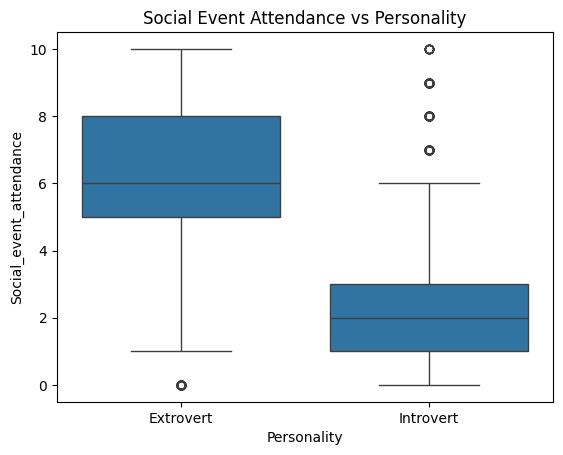

In [14]:
sns.boxplot(data=df, x='Personality', y='Social_event_attendance')
plt.title("Social Event Attendance vs Personality")


<Axes: >

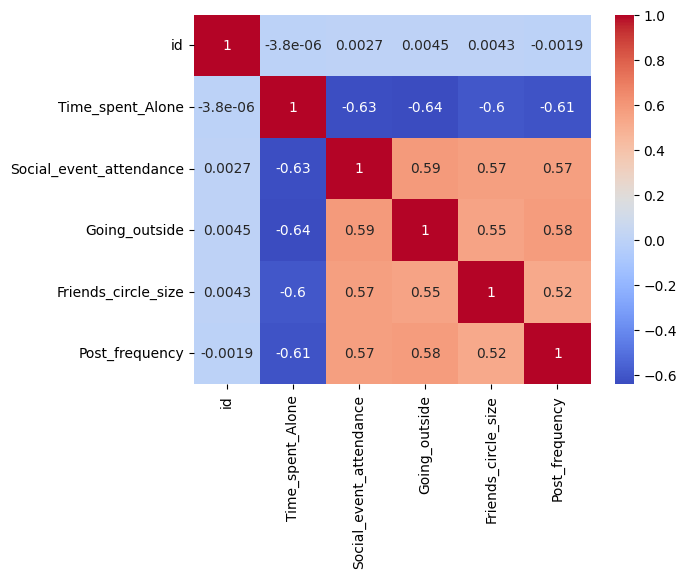

In [15]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


<Axes: xlabel='Time_spent_Alone', ylabel='Count'>

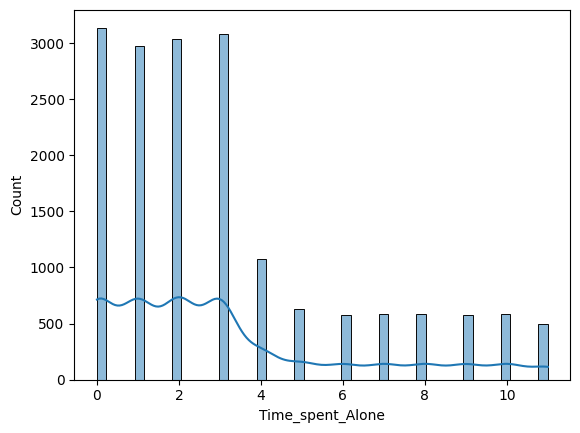

In [16]:

sns.histplot(df['Time_spent_Alone'], kde=True)


<Axes: xlabel='Social_event_attendance', ylabel='Count'>

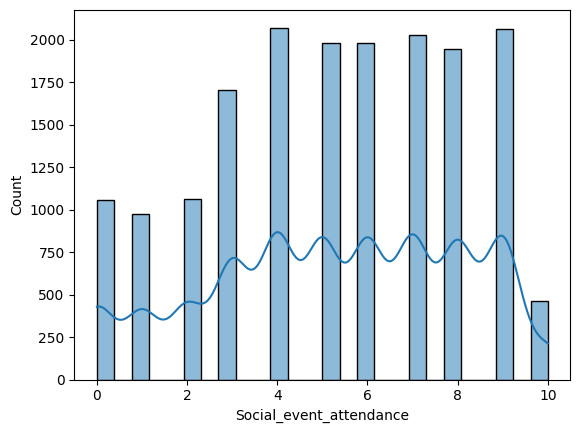

In [17]:

sns.histplot(df['Social_event_attendance'], kde=True)


In [18]:
print(df['Social_event_attendance'].skew())

-0.22923760229450502


Skewness of 'Going_outside': -0.3672


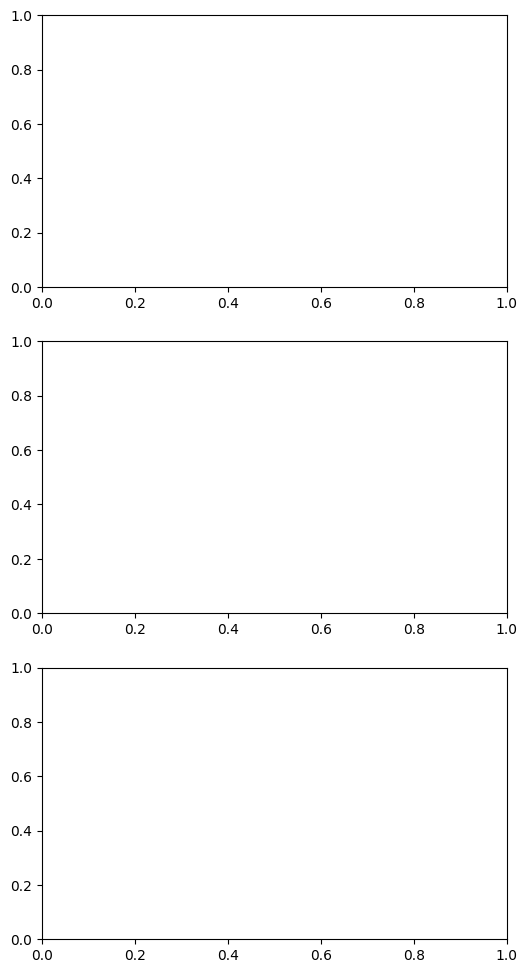

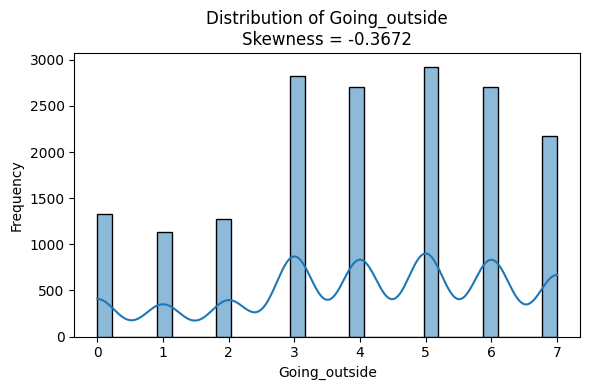

Skewness of 'Friends_circle_size': -0.0518


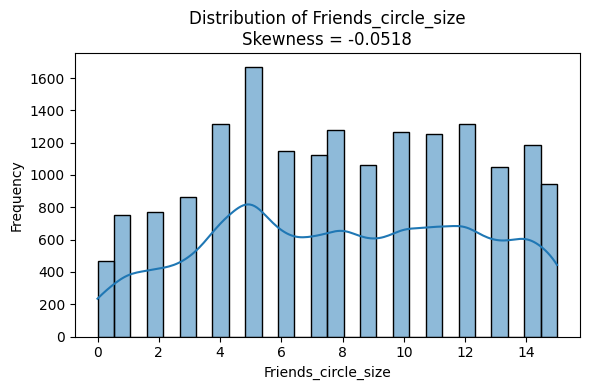

Skewness of 'Post_frequency': -0.0587


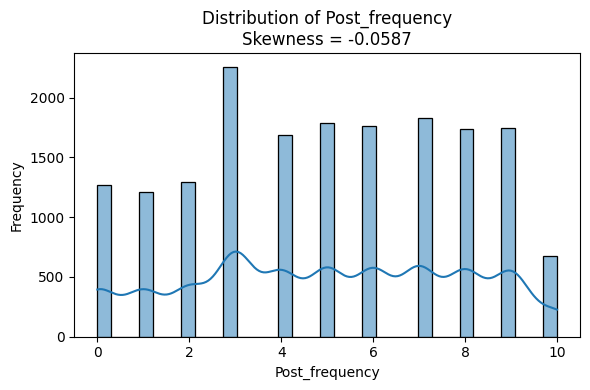

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = [ 'Going_outside','Friends_circle_size','Post_frequency'  ]
n = len(columns)

fig, axes = plt.subplots(n, 1, figsize=(6, 4 * n))

for col in columns:
    skew_val = df[col].skew()
    print(f"Skewness of '{col}': {skew_val:.4f}")
    
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}\nSkewness = {skew_val:.4f}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()




#### Observations:

**Time_spent_Alone** – skewed positively  
**Social_event_attendance** – not skewed  
**Going_outside** – not skewed  
**Friends_circle_size** – not skewed  
**Post_frequency** – not skewed  


### Prepaing data and feature engineering

#### Handling missing values

In [20]:
df.isnull().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [21]:
df.drop_duplicates(inplace=True)

In [22]:

numerical_cols = [
    'Social_event_attendance',
    'Going_outside',
    'Friends_circle_size',
    'Post_frequency'
]

categorical_cols = ['Stage_fear', 'Drained_after_socializing']

In [23]:
from sklearn.impute import SimpleImputer

In [24]:

num_imputer = SimpleImputer(strategy='mean')

median=SimpleImputer(strategy='median')

cat_imputer = SimpleImputer(strategy='most_frequent')


In [25]:
df[numerical_cols]=num_imputer.fit_transform(df[numerical_cols])
df[["Time_spent_Alone"]]=median.fit_transform(df[["Time_spent_Alone"]])
df[categorical_cols]=cat_imputer.fit_transform(df[categorical_cols])

In [26]:
df.isnull().sum()

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

#### Convert categorical data to numerical

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           18524 non-null  float64
 2   Stage_fear                 18524 non-null  object 
 3   Social_event_attendance    18524 non-null  float64
 4   Going_outside              18524 non-null  float64
 5   Drained_after_socializing  18524 non-null  object 
 6   Friends_circle_size        18524 non-null  float64
 7   Post_frequency             18524 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [30]:
df.Personality.value_counts()

Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64

In [31]:
df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
df['Personality'] = df['Personality'].map({'Introvert': 0, 'Extrovert': 1})


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           18524 non-null  float64
 2   Stage_fear                 18524 non-null  int64  
 3   Social_event_attendance    18524 non-null  float64
 4   Going_outside              18524 non-null  float64
 5   Drained_after_socializing  18524 non-null  int64  
 6   Friends_circle_size        18524 non-null  float64
 7   Post_frequency             18524 non-null  float64
 8   Personality                18524 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 1.3 MB


In [33]:
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,0,6.0,4.0,0,15.0,5.000000,1
1,1,1.0,0,7.0,3.0,0,10.0,8.000000,1
2,2,6.0,1,1.0,0.0,0,3.0,0.000000,0
3,3,3.0,0,7.0,3.0,0,11.0,5.000000,1
4,4,1.0,0,4.0,4.0,0,13.0,4.982097,1


#### Outlier handling

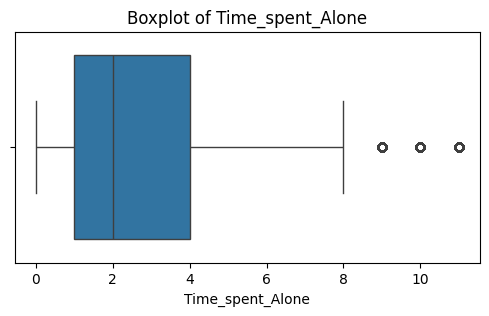

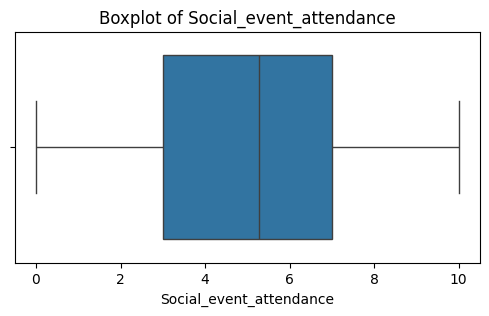

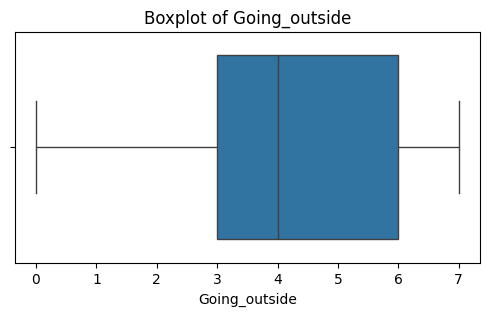

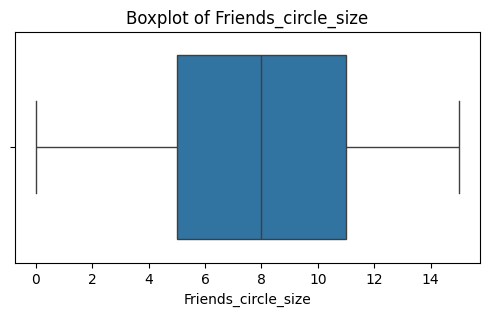

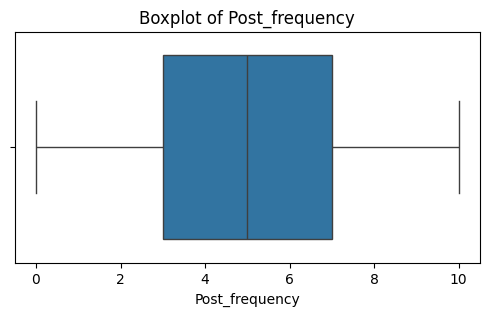

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                'Friends_circle_size', 'Post_frequency']

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [35]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


Time_spent_Alone: 1653 outliers
Social_event_attendance: 0 outliers
Going_outside: 0 outliers
Friends_circle_size: 0 outliers
Post_frequency: 0 outliers


In [36]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_extreme = Q1 - 3 * IQR
    upper_extreme = Q3 + 3 * IQR

    df = df[(df[col] >= lower_extreme) & (df[col] <= upper_extreme)]


In [37]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)


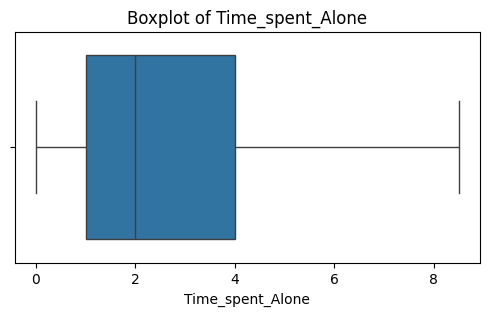

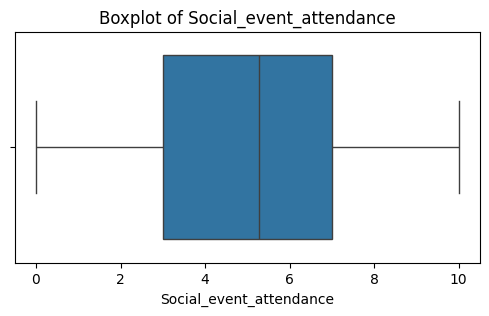

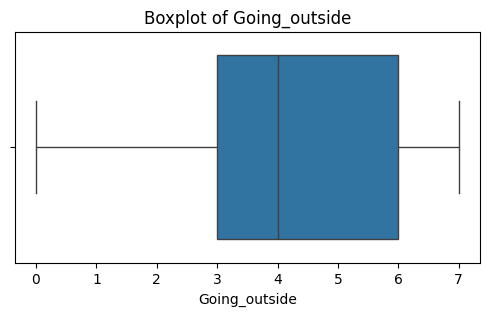

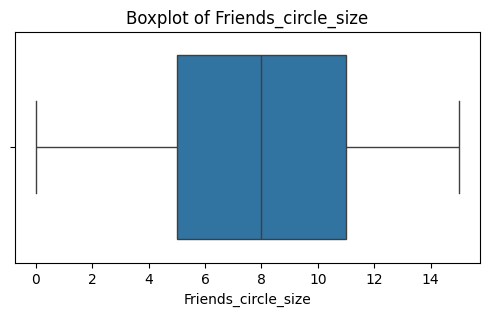

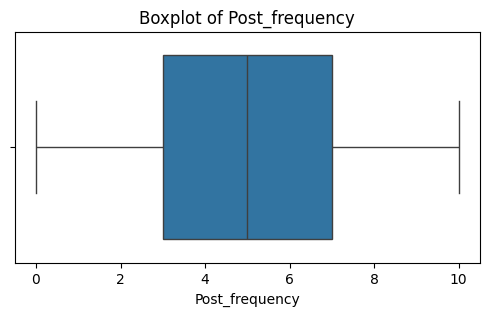

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                'Friends_circle_size', 'Post_frequency']

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


#### feature engineering

In [39]:
df['social_balance'] = df['Social_event_attendance'] - df['Time_spent_Alone']


In [40]:
df['is_social'] = (df['Social_event_attendance'] > 5).astype(int)


In [63]:
df['Post_frequency'] = np.log1p(df['Post_frequency'])


#### Scaling

In [64]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])


scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])


In [65]:
df_scale=df.copy()

In [66]:
df_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           18524 non-null  float64
 2   Stage_fear                 18524 non-null  int64  
 3   Social_event_attendance    18524 non-null  float64
 4   Going_outside              18524 non-null  float64
 5   Drained_after_socializing  18524 non-null  int64  
 6   Friends_circle_size        18524 non-null  float64
 7   Post_frequency             18524 non-null  float64
 8   Personality                18524 non-null  int64  
 9   social_balance             18524 non-null  float64
 10  is_social                  18524 non-null  int64  
 11  Post_frequency_log         18524 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 1.7 MB


In [67]:
df[numerical_cols]=df_scaled

In [68]:
df_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           18524 non-null  float64
 2   Stage_fear                 18524 non-null  int64  
 3   Social_event_attendance    18524 non-null  float64
 4   Going_outside              18524 non-null  float64
 5   Drained_after_socializing  18524 non-null  int64  
 6   Friends_circle_size        18524 non-null  float64
 7   Post_frequency             18524 non-null  float64
 8   Personality                18524 non-null  int64  
 9   social_balance             18524 non-null  float64
 10  is_social                  18524 non-null  int64  
 11  Post_frequency_log         18524 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 1.7 MB


# 3. Modeling

In [69]:
X=df_scale.drop("Personality",axis=1)
y=df_scale["Personality"]

In [70]:
X.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,social_balance,is_social,Post_frequency_log
0,0,0.0,0,0.6,0.571429,0,1.000000,0.405465,6.0,1,0.405465
1,1,1.0,0,0.7,0.428571,0,0.666667,0.587787,6.0,1,0.587787
2,2,6.0,1,0.1,0.000000,0,0.200000,0.000000,-5.0,0,0.000000
3,3,3.0,0,0.7,0.428571,0,0.733333,0.405465,4.0,1,0.405465
4,4,1.0,0,0.4,0.571429,0,0.866667,0.404271,3.0,0,0.404271


In [71]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Personality, dtype: int64

In [72]:
X=X.drop("id",axis=1)

In [74]:
X=X.drop("Post_frequency_log",axis=1)

In [75]:
X.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,social_balance,is_social
0,0.0,0,0.6,0.571429,0,1.000000,0.405465,6.0,1
1,1.0,0,0.7,0.428571,0,0.666667,0.587787,6.0,1
2,6.0,1,0.1,0.000000,0,0.200000,0.000000,-5.0,0
3,3.0,0,0.7,0.428571,0,0.733333,0.405465,4.0,1
4,1.0,0,0.4,0.571429,0,0.866667,0.404271,3.0,0


In [77]:
from sklearn.model_selection import train_test_split

In [78]:

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)



In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [82]:

X_train_final = np.concatenate((X_train, X_valid))
y_train_final = np.concatenate((y_train, y_valid))


best_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_model.fit(X_train_final, y_train_final)


,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [84]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

y_test_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Test Accuracy: 0.968421052631579
[[ 886   66]
 [  51 2702]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       952
           1       0.98      0.98      0.98      2753

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



C:\Users\HP\Desktop\prof\learn\MLlearning\Kaggle competition\kenv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Training SVC...
SVC - Val Acc: 0.9673 | Test Acc: 0.9687
Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

Training Logistic Regression...
Logistic Regression - Val Acc: 0.9682 | Test Acc: 0.9687
Best Params: {'C': 10, 'solver': 'liblinear'}

Training Gradient Boosting...
Gradient Boosting - Val Acc: 0.9682 | Test Acc: 0.9684
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

Training KNN...
KNN - Val Acc: 0.9684 | Test Acc: 0.9684
Best Params: {'n_neighbors': 7, 'weights': 'uniform'}



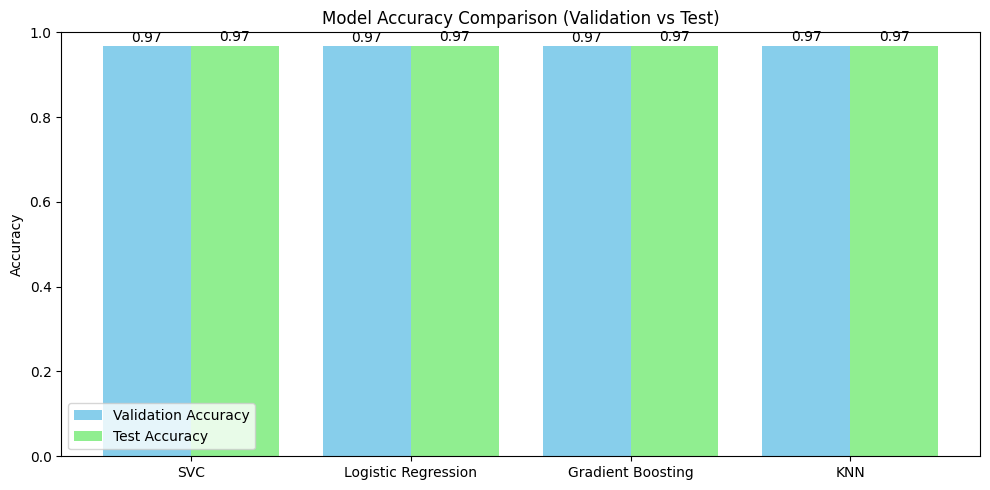

In [85]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


models = {
    "SVC": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ['linear', 'rbf'],
            "gamma": ['scale', 'auto']
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "solver": ['liblinear', 'lbfgs']
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ['uniform', 'distance']
        }
    }
}

val_scores = {}
test_scores = {}
best_estimators = {}

for name, mp in models.items():
    print(f"Training {name}...")
    grid = GridSearchCV(mp["model"], mp["params"], cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    

    y_val_pred = best_model.predict(X_valid)
    val_acc = accuracy_score(y_valid, y_val_pred)
    

    y_test_pred = best_model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    val_scores[name] = val_acc
    test_scores[name] = test_acc
    best_estimators[name] = best_model
    
    print(f"{name} - Val Acc: {val_acc:.4f} | Test Acc: {test_acc:.4f}")
    print(f"Best Params: {grid.best_params_}\n")


labels = list(val_scores.keys())
x = range(len(labels))

plt.figure(figsize=(10, 5))
plt.bar([i - 0.2 for i in x], [val_scores[l] for l in labels], width=0.4, label='Validation Accuracy', color='skyblue')
plt.bar([i + 0.2 for i in x], [test_scores[l] for l in labels], width=0.4, label='Test Accuracy', color='lightgreen')

plt.xticks(x, labels)
plt.title("Model Accuracy Comparison (Validation vs Test)")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.legend()

for i, label in enumerate(labels):
    plt.text(i - 0.2, val_scores[label] + 0.01, f"{val_scores[label]:.2f}", ha='center')
    plt.text(i + 0.2, test_scores[label] + 0.01, f"{test_scores[label]:.2f}", ha='center')

plt.tight_layout()
plt.show()


In [86]:

X_full_train = np.concatenate((X_train, X_valid), axis=0)
y_full_train = np.concatenate((y_train, y_valid), axis=0)


In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


log_reg_params = {'C': [0.1, 1, 10], 'solver': ['liblinear']}
log_reg_grid = GridSearchCV(LogisticRegression(max_iter=1000), log_reg_params, cv=3, scoring='accuracy', n_jobs=-1)
log_reg_grid.fit(X_full_train, y_full_train)
best_lr = log_reg_grid.best_estimator_


svc_params = {'C': [0.1, 1], 'kernel': ['linear'], 'gamma': ['scale']}
svc_grid = GridSearchCV(SVC(probability=True), svc_params, cv=3, scoring='accuracy', n_jobs=-1)
svc_grid.fit(X_full_train, y_full_train)
best_svc = svc_grid.best_estimator_


gb_params = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [3]
}
gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_params, cv=3, scoring='accuracy', n_jobs=-1)
gb_grid.fit(X_full_train, y_full_train)
best_gb = gb_grid.best_estimator_


In [88]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


voting_clf = VotingClassifier(
    estimators=[
        ('lr', best_lr),
        ('svc', best_svc),
        ('gb', best_gb)
    ],
    voting='soft'
)

voting_clf.fit(X_full_train, y_full_train)

y_test_pred = voting_clf.predict(X_test)
acc = accuracy_score(y_test, y_test_pred)

print(f"\n📈 Voting Classifier Test Accuracy: {acc:.4f}")



📈 Voting Classifier Test Accuracy: 0.9687


C:\Users\HP\Desktop\prof\learn\MLlearning\Kaggle competition\kenv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\HP\Desktop\prof\learn\MLlearning\Kaggle competition\kenv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\HP\Desktop\prof\learn\MLlearning\Kaggle competition\kenv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [89]:
import joblib

joblib.dump(voting_clf, "voting_model.pkl")

['voting_model.pkl']